In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\steel code.csv")
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [3]:
df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scratch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [4]:
print ("dataset:",df.shape) 

dataset: (19219, 35)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [6]:
df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scratch                0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

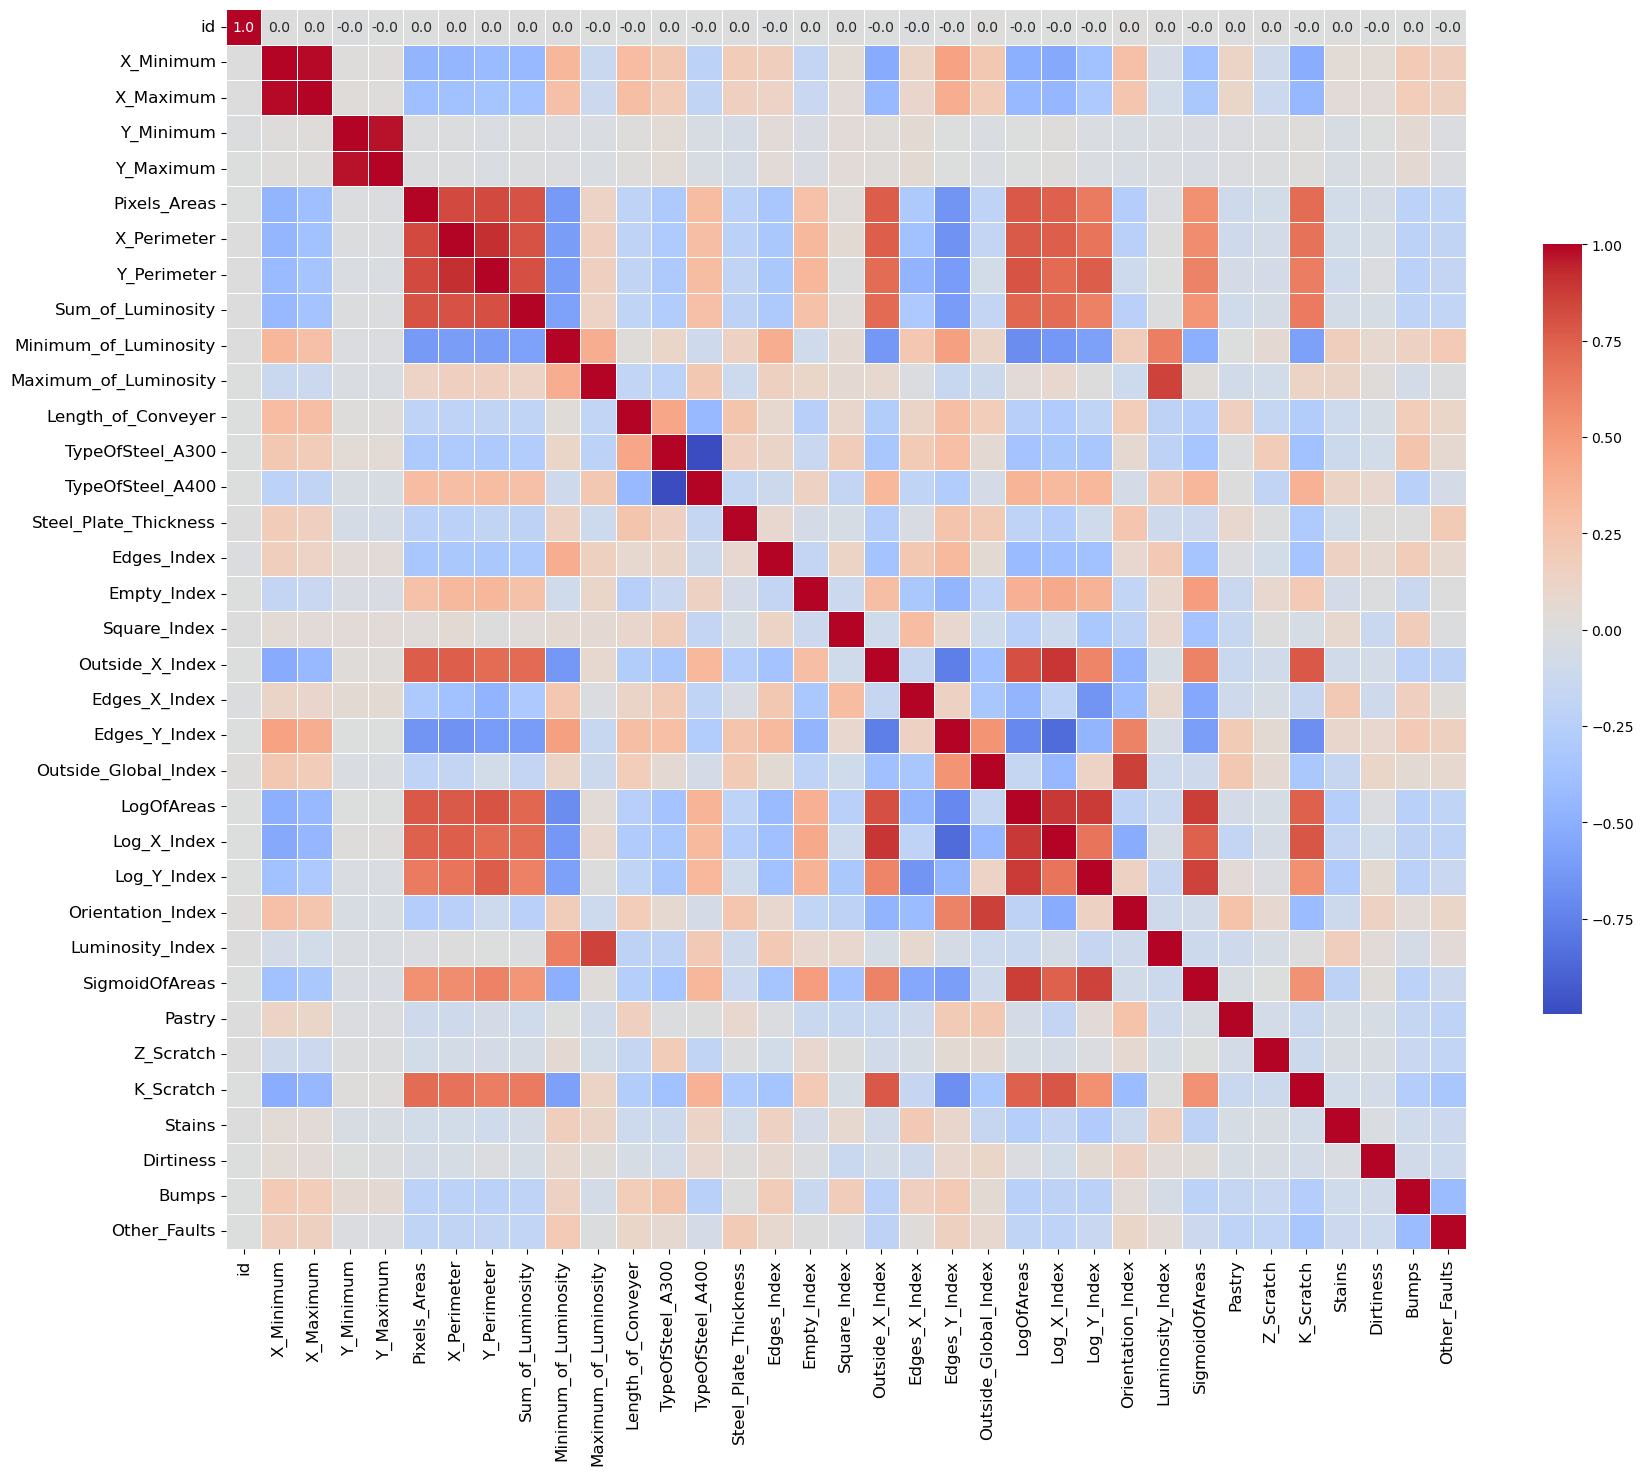

In [8]:
#make the correlation matrix to know more about the data
correlation = df.corr()
f, axs = plt.subplots(figsize= (20,20))
sns.heatmap(correlation, annot= True, fmt= ".1f", linewidths= 0.5, square= True, cmap= 'coolwarm', cbar_kws={"shrink": .5}, ax= axs)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [10]:
#GaussianNB 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the classifier
gnb.fit(X_train, y_train)

GaussianNB()

In [12]:
predictions = gnb.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)*100
print("Accuracy:", accuracy)

Accuracy: 79.5


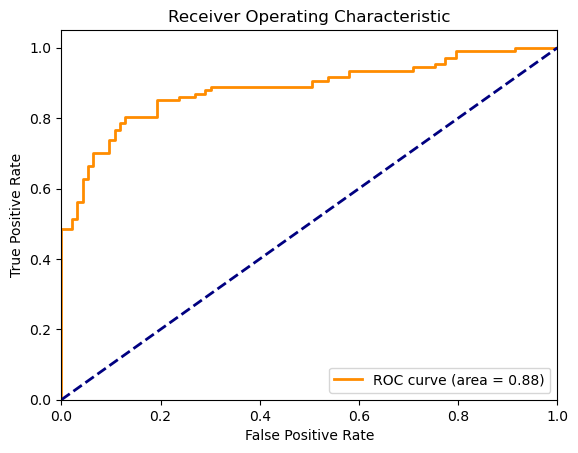

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
gnb_model=GaussianNB()
gnb_model.fit(X_train,y_train)  
test_y_prob = gnb_model.predict_proba(X_test)[:, 1]
# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_y_prob)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [14]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a k-NN classifier with k=5 (you can adjust the value of k)
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier
knn.fit(X_train, y_train)

# Making predictions on the testing set
predictions = knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)*100
print("Accuracy:", accuracy)

Accuracy: 81.0


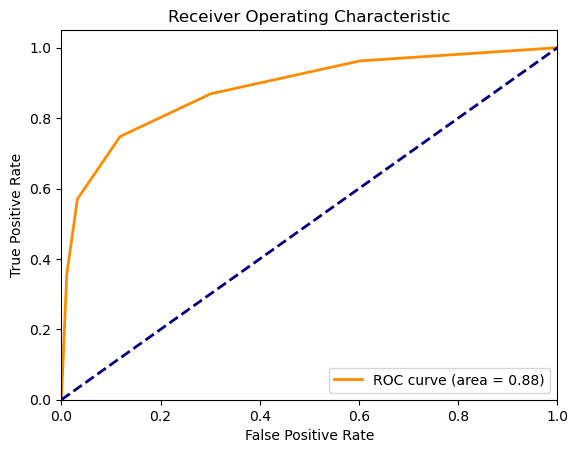

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)  
test_y_prob = knn_model.predict_proba(X_test)[:, 1]
# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_y_prob)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gaussian Naive Bayes classifier
rfc = RandomForestClassifier()

# Training the classifier
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
predictions = rfc.predict(X_test)
predictions

accuracy = accuracy_score(y_test, predictions)*100
print("Accuracy:", accuracy)

Accuracy: 89.5


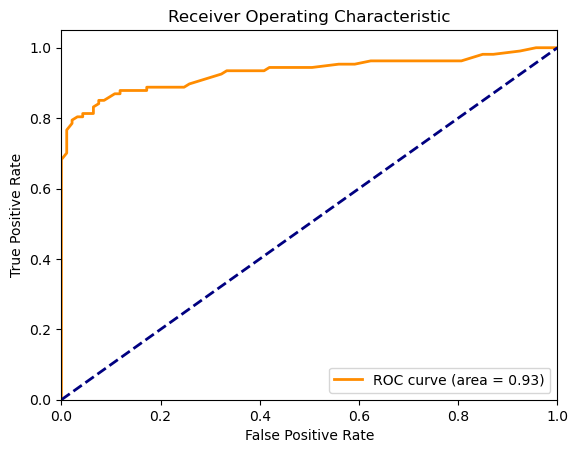

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)  
test_y_prob = rfc_model.predict_proba(X_test)[:, 1]
# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_y_prob)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

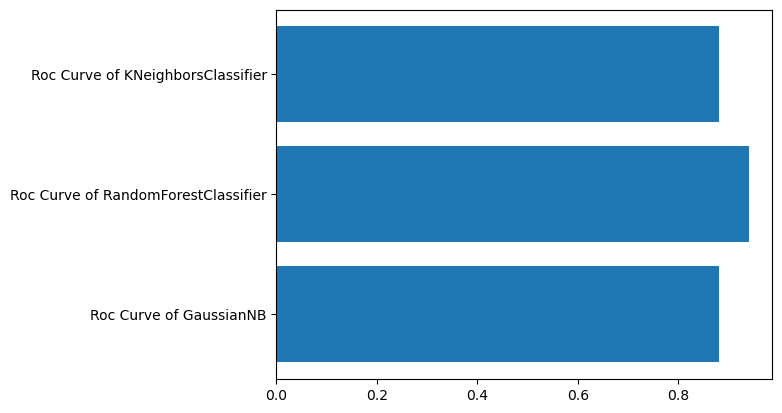

In [20]:
X=np.array(["Roc Curve of GaussianNB","Roc Curve of RandomForestClassifier","Roc Curve of KNeighborsClassifier"]) 
Y=np.array([0.88,0.94,0.88]) 
plt.barh(X,Y)
plt.show()

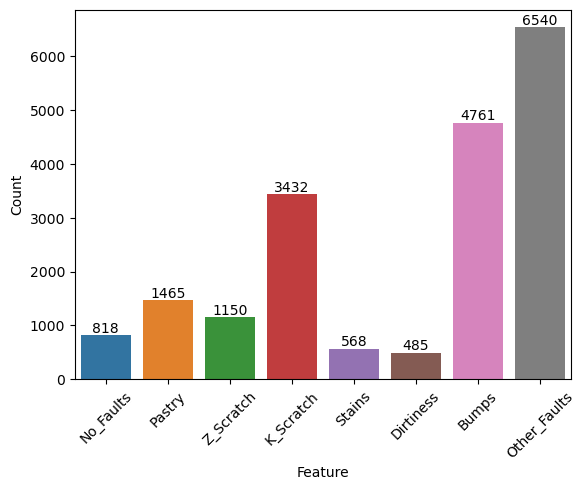

In [21]:
target_features = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
target_data = df[target_features]
target = target_data@(np.arange(target_data.shape[1])+1)
target[target_data.sum(axis=1)==2] = 3

ax = sns.countplot(x=target)
ax.bar_label(ax.containers[0], fontsize=10)
tick_labels = list(target_data.columns)
tick_labels.insert(0, 'No_Faults')

ax.set(xlabel='Feature', ylabel='Count', xticklabels=tick_labels)
ax.tick_params(axis='x', rotation=45)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
train_X = train[['id','X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Orientation_Index','Luminosity_Index','SigmoidOfAreas']]
train_y = train.Pastry

test_X=test[['id','X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Orientation_Index','Luminosity_Index','SigmoidOfAreas']]
test_y=test.Pastry

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
RF_model=RandomForestClassifier()
RF_model.fit(train_X,train_y)
pred=RF_model.predict(test_X)

In [25]:
new_data=[[24,1538,1549,849219,849235,275,19,32,28986,71,0.6250,-0.2988,0.6330]]
pred=RF_model.predict(new_data)
print("prediction For RF:",pred)


prediction For RF: [1]


In [26]:
new_data=[[40,525,585,75115,75122,155,20,21,15572,97,0.0625,-0.1485,0.3977]]
pred=RF_model.predict(new_data)
print("prediction For RF:",pred)

prediction For RF: [0]


In [27]:
# Combine defect columns into a single target column
defect_columns = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['Defect_Type'] = df[defect_columns].idxmax(axis=1)

# Splitting the dataset into training and testing sets
feature_columns = ['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
                   'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity',
                   'Maximum_of_Luminosity','Length_of_Conveyer','TypeOfSteel_A300','TypeOfSteel_A400','Steel_Plate_Thickness','Edges_Index',
                   'Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index',	
                   'LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index', 'SigmoidOfAreas']

X = df[feature_columns]
y = df['Defect_Type']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(train_X, train_y)

# New data for prediction
new_data = [[14,39,220,1835934,1836000,6644,302,136,689961,80,124,1356,0,1,40,0.0574,0.4571,0.4124,0.1333,0.5662,0.4853,0,3.8224,2.2577,1.8195,-0.5876,-0.1891,1]]

# Making prediction on new data
new_pred = RF_model.predict(new_data)
print("Prediction for new data:", new_pred)


Prediction for new data: ['K_Scratch']
